In [ ]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from google.colab import files
import matplotlib.pyplot as plt
import csv
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
files.upload()

Saving fashion-mnist_train.csv to fashion-mnist_train (1).csv


In [ ]:
files.upload()

{}

In [ ]:
# READ THROUGH EACH LINE IN THE TRAINING CSV

train_image_list = []
train_label_list = []
with open("fashion-mnist_train.csv", "r") as train_file:
  # CREATE THE READER THAT READS EACH LINE
  reader = csv.reader(train_file, delimiter = ",")
  # THIS IS HOW YOU SKIP OVER A LINE
  # THE LINE BEING SKIPPED IS THE HEADER (COLUMN NAMES)
  next(reader)
  for row in reader:
    # THE LABEL IS THE FIRST ELEMENT IN EACH ROW
    # APPEND EACH LABEL TO ITS OWN ROW
    label = row[0]
    train_label_list.append(label)
    # DELETE THE LABEL FROM EACH LIST
    row.pop(0)
    # WHATS LEFT IN THE LIST IS JUST THE PIXELS FOR THE IMAGES (NO LABELS)
    train_image_list.append(row)


In [ ]:
# READ THROUGH EACH LINE IN THE TEST CSV

test_image_list = []
test_label_list = []
with open("fashion-mnist_test.csv", "r") as test_file:
  # CREATE THE READER THAT READS EACH LINE
  reader = csv.reader(test_file, delimiter = ",")
  # THIS IS HOW YOU SKIP OVER A LINE
  # THE LINE BEING SKIPPED IS THE HEADER (COLUMN NAMES)
  next(reader)
  for row in reader:
    # THE LABEL IS THE FIRST ELEMENT IN EACH ROW
    # APPEND EACH LABEL TO ITS OWN ROW
    label = row[0]
    test_label_list.append(label)
    # DELETE THE LABEL FROM EACH LIST
    row.pop(0)
    # WHATS LEFT IN THE LIST IS JUST THE PIXELS FOR THE IMAGES (NO LABELS)
    test_image_list.append(row)

In [ ]:
# CONVERT THE ELEMENTS IN THE LIST FROM STR --> INT

train_labels = []
for elem in train_label_list:
  elem = int(elem)
  train_labels.append(elem)

In [ ]:
# CONVERT THE ELEMENTS IN EACH LIST FROM STR --> INT

train_images = []
for item in train_image_list:
  for i in range(len(item)):
    item[i] = int(item[i])

In [ ]:
train_data_with_label = pd.read_csv("fashion-mnist_train.csv")
train_data_with_label.head()

<bound method NDFrame.head of        label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0          2       0       0       0  ...         0         0         0         0
1          9       0       0       0  ...         0         0         0         0
2          6       0       0       0  ...         0         0         0         0
3          0       0       0       0  ...         0         0         0         0
4          3       0       0       0  ...         0         0         0         0
...      ...     ...     ...     ...  ...       ...       ...       ...       ...
59995      9       0       0       0  ...         0         0         0         0
59996      1       0       0       0  ...         0         0         0         0
59997      8       0       0       0  ...         0         0         0         0
59998      8       0       0       0  ...         0         0         0         0
59999      7       0       0       0  ...         0         0       

In [ ]:
test_data_with_label = pd.read_csv("fashion-mnist_test.csv")
test_data_with_label.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


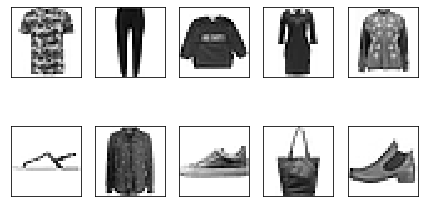

In [ ]:
# SHOW AN EXAMPLE IMAGE OF EACH TYPE OF CLOTHING IN THE DATASET



# CREATE 10 SUBPLOTS, 2 ROWS AND 5 COLUMNS LONG WITH THE SAME X AND Y AXIS
fig, ax = plt.subplots(nrows = 2, ncols = 5, sharex = True, sharey = True)
ax = ax.flatten()
for i in range(0,10):
  # FIND THE INDEX VALUE OF EVERY DIFFERENT LABEL (0-9)
    # only finds the first occurance in this case
  # THIS INDEX MATCHES UP WITH A PICTURE IN THE IMAGES LIST
  image = train_image_list[train_labels.index(i)]

  # CONVERT THE LIST OF PIXELS INTO A NUMPY ARRAY
    # a list cannot be reshaped, must be an array
    # go from (1, 754) to (28,28)
  # RESHAPE THE ARRAY TO THE SIZE OF THE PICTURE (28,28) IN THIS CASE
  image = np.asarray(image).reshape(28,28)

  # EACH DIFFERENT AXIS WILL BE A DIFFERENT PIECE OF CLOTHING
  ax[i].imshow(image, cmap = "Greys", interpolation = "nearest")

# GET RID OF THE X AND Y TICKS
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

[Text(0, 0, 'T-Shirt'),
 Text(0, 0, 'Trousers'),
 Text(0, 0, 'Pullover'),
 Text(0, 0, 'Dress'),
 Text(0, 0, 'Coat'),
 Text(0, 0, 'Sandal'),
 Text(0, 0, 'Shirt'),
 Text(0, 0, 'Sneaker'),
 Text(0, 0, 'Bag'),
 Text(0, 0, 'Ankle Boot')]

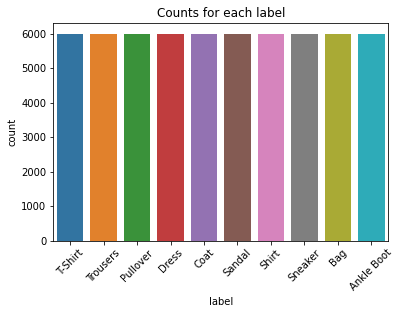

In [ ]:
# CREATE A PLOT WITH THE COUNTS OF EACH LABEL
counts = sns.countplot(x = "label", data = train_data_with_label)

# CHANGE THE TITLE OF THE CHART
counts.set_title("Counts for each label")

# SET THE POSITION OF THE TICKS
  # should be the same length of the number of bars
counts.set_xticks([0,1,2,3,4,5,6,7,8,9])

# CHANGE THE LABELS OF THE TICKS
# ROTATE THE LABELS SO THEY CAN BE READ AND DO NOT OVERLAP EACH OTHER
counts.set_xticklabels(["T-Shirt", "Trousers", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"], 
                       rotation = 45)
                       

In [ ]:
training_labels = train_data_with_label["label"]
training_labels.reset_index(inplace = True, drop = True)
training_data = train_data_with_label.drop("label", axis = 1, inplace = False)
training_data.reset_index(inplace = True, drop = True)

In [ ]:
print("Train label shape: ", training_labels.shape)
print("Train data shape: ", training_data.shape)

Train label shape:  (60000,)
Train data shape:  (60000, 784)


In [ ]:
testing_labels = test_data_with_label["label"]
testing_labels.reset_index(inplace = True, drop = True)
testing_data = test_data_with_label.drop("label", axis = 1, inplace = False)
testing_labels.reset_index(inplace = True, drop = True)

In [ ]:
print("Test label shape: ", testing_labels.shape)
print("Test data shape: ", testing_data.shape)

Test label shape:  (10000,)
Test data shape:  (10000, 784)


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
nb = MultinomialNB()
nb_model = nb.fit(training_data, training_labels)
nb_pred = nb_model.predict(testing_data)
nb_confusion = confusion_matrix(testing_labels, nb_pred)
nb_accuracy = accuracy_score(testing_labels, nb_pred)
print(nb_confusion)
print("\nNaive Bayes Accuracy: %", nb_accuracy * 100)


[[773   3   6 123   6   0  63   0  26   0]
 [ 14 902  16  55   3   0  10   0   0   0]
 [  6   0 606  13 269   0  87   0  19   0]
 [ 28  18   1 899  12   0  40   0   2   0]
 [  0   3 194 140 621   0  32   0  10   0]
 [  1   0   2   1   0 163  13 508  11 301]
 [225   0 139  90 361   0 148   0  37   0]
 [  0   0   0   0   0  26   0 903   0  71]
 [  1   0   2  44  58   3  42  11 838   1]
 [  0   0   2   0   1  39  19 116   2 821]]

Naive Bayes Accuracy: % 66.74
